#### 1.Импорт библиотеки pandas как pd. Загрузка двух датасетов user_data и logs. Проверить размер таблицы, типы переменных, посмотреть на описательную статистику. Сколько уникальных значений принимает переменная platform

In [1]:
import pandas as pd

In [2]:
users = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_3_python/3_user_data.csv')

In [4]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_3_python/3_logs.csv')

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [41]:
users.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [10]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [42]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [11]:
users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [12]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [13]:
logs.platform.nunique()

3

Переменная platform принимает 3 уникальных значения

#### 2.Какой клиент совершил больше всего успешных операций?

In [25]:
logs.query("success == True").groupby('client', as_index=False)\
    .agg({'success':'count'})\
    .sort_values('success', ascending=False).head(10)

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


#### 3. С какой платформы осуществляется наибольшее количество успешных операций?

In [27]:
logs.query("success == True").groupby('platform', as_index=False)\
    .agg({'success':'count'})\
    .sort_values('success', ascending=False)

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


#### 4. Какая платформа наиболее популярна среди премиумных клиентов?

In [28]:
premium_clients = logs.merge(users, on='client')

In [29]:
premium_clients.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [31]:
premium_clients.query("premium == True").groupby('platform', as_index=False)\
                .agg({'premium':'count'}).sort_values('premium', ascending=False)

,platform,premium
1,phone,246
0,computer,150
2,tablet,24


In [32]:
premium_clients.loc[premium_clients.premium == True].platform.value_counts().idxmax()

'phone'

#### 5. Визуализация распределения возраста клиентов в зависимости от типа клиента (обычный или премиум), с использованием библиотеки seaborn с параметрами цвета по умолчанию.

In [33]:
import seaborn as sns

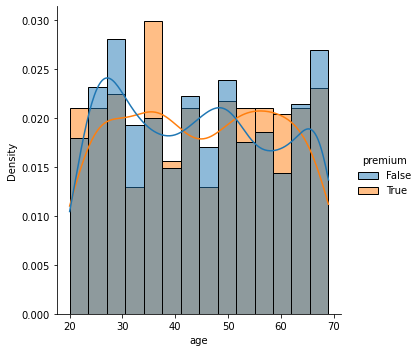

In [34]:
sns.displot(data=premium_clients, x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            bins=14)
sns.despine()

#### 6. График распределения числа успешных операций

In [36]:
success_count = logs.loc[logs.success == True].client.value_counts()
success_count = success_count.rename('successes')
success_count

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: successes, Length: 2845, dtype: int64

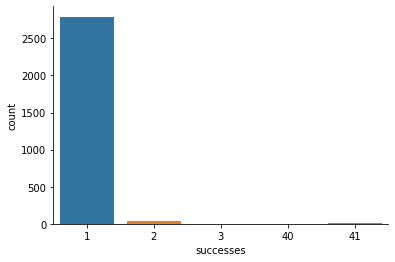

In [37]:
sns.countplot(x=success_count)
sns.despine()

#### 7. Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций

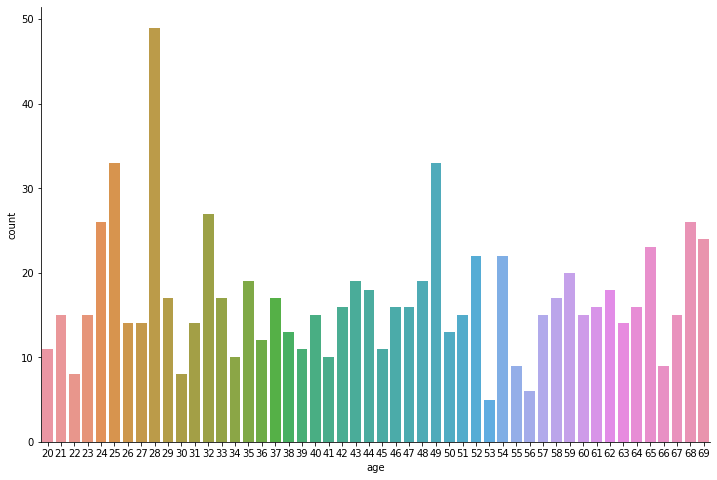

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=premium_clients.loc[(premium_clients.platform == 'computer')
                                   & (premium_clients.success == True)], 
             x='age')
sns.despine()